# Introduction

This notebook contains a comprehensive set of analyses for Walmart's online store, focusing on customer segmentation, product recommendations, and pricing strategy optimization to maximize sales and profitability. The following analyses have been conducted:

1. **Customer Segmentation**:
   - We segmented Walmart’s customer base using demographic and purchasing behavior data. By applying clustering techniques, we identified distinct customer groups with varying behaviors, preferences, and spending patterns. This segmentation helps tailor marketing efforts, product recommendations, and targeted promotions to each segment, improving customer satisfaction and engagement.

2. **Product Recommendation System**:
   - A collaborative filtering-based recommendation system was built to suggest relevant products to users based on their previous purchase history. This system helps enhance the shopping experience by offering personalized product suggestions, driving increased sales, and improving customer retention.

3. **Pricing Strategy Optimization**:
   - To maximize sales and profitability, we analyzed the relationship between product pricing and purchasing behavior. By calculating price elasticity and evaluating profitability across product categories, we identified which products are more price-sensitive. This analysis allows Walmart to fine-tune its pricing strategy, increasing prices for inelastic products while maintaining or lowering prices for elastic ones to stimulate demand.

Each analysis provides actionable insights that can help Walmart improve customer engagement, optimize its pricing strategies, and ultimately drive higher revenue and profitability. The results from these analyses offer valuable guidance for making data-driven decisions that align with business goals.

## Basic Exploration

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## Visualizing Distributions

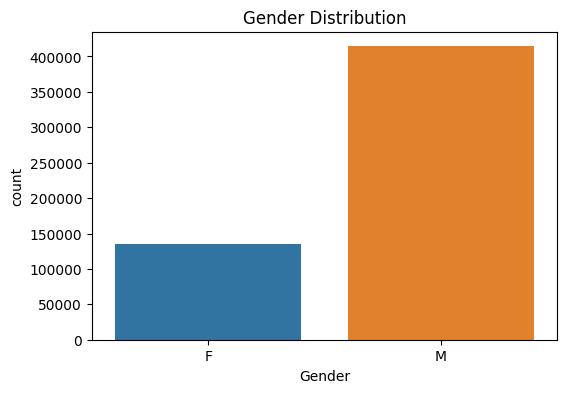

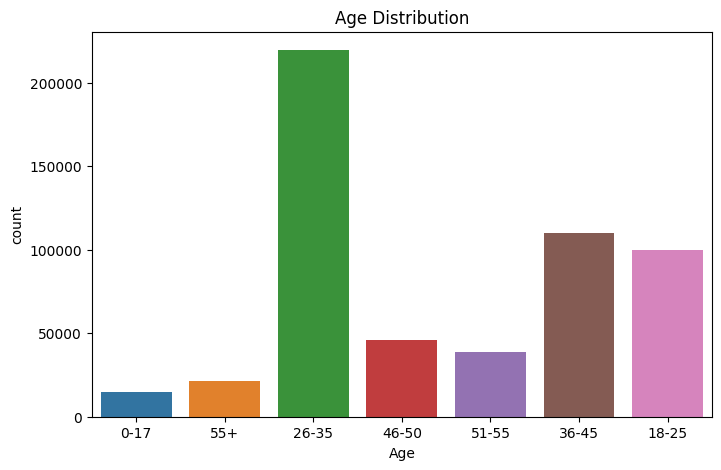

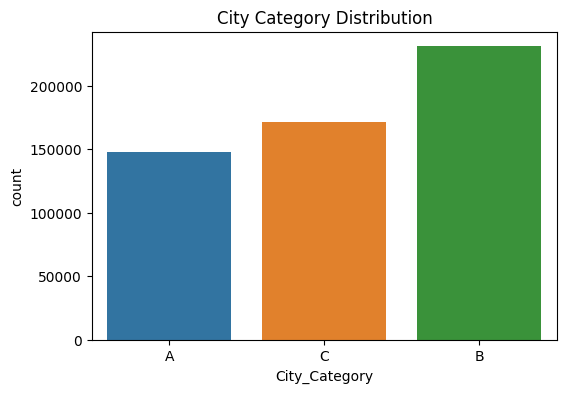

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Age distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.show()

# City category distribution
plt.figure(figsize=(6,4))
sns.countplot(x='City_Category', data=df)
plt.title('City Category Distribution')
plt.show()

## Analyzing Purchase Amounts

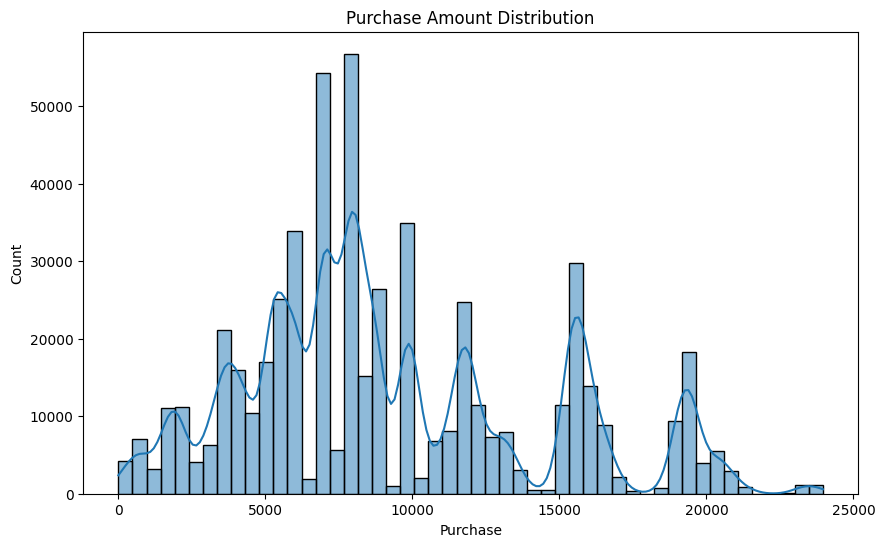

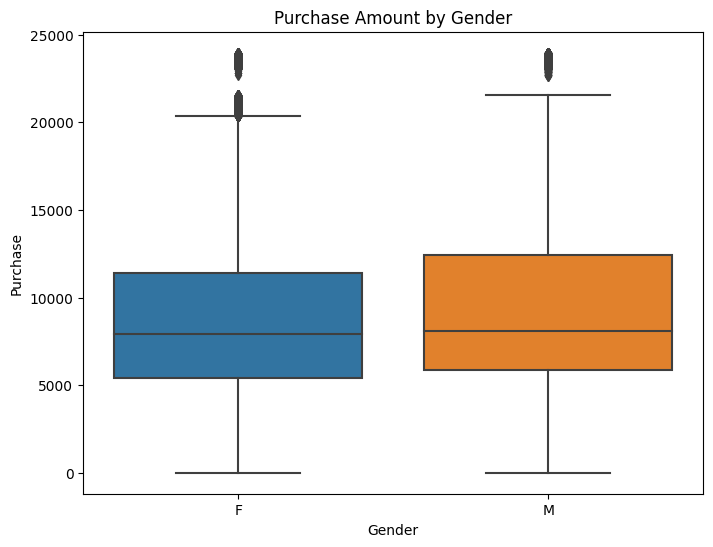

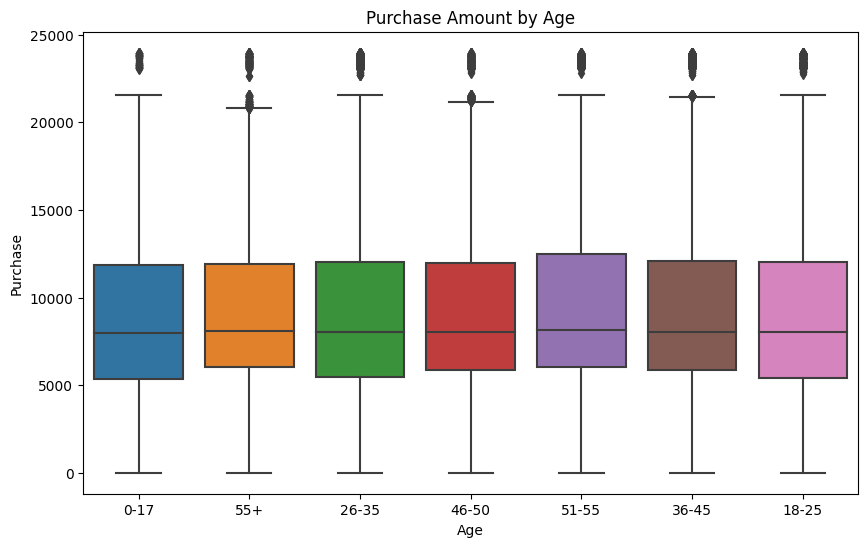

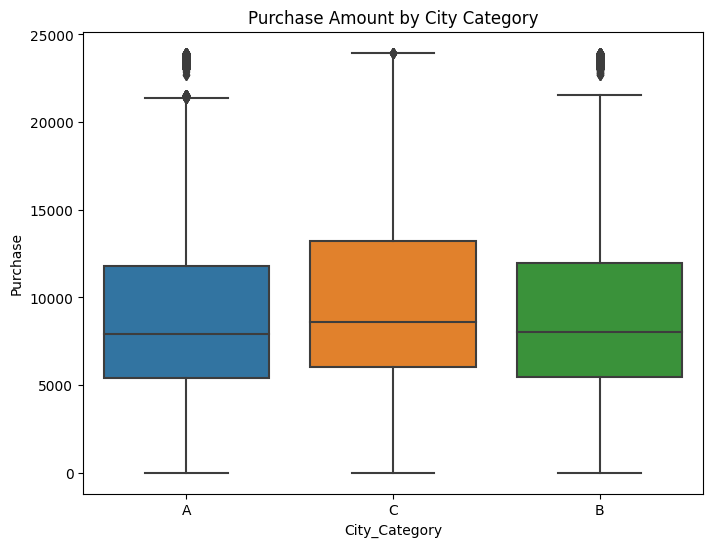

In [7]:
# Distribution of Purchase amounts
plt.figure(figsize=(10,6))
sns.histplot(df['Purchase'], bins=50, kde=True)
plt.title('Purchase Amount Distribution')
plt.show()

# Purchase amounts by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amount by Gender')
plt.show()

# Purchase amounts by Age
plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Purchase Amount by Age')
plt.show()

# Purchase amounts by City Category
plt.figure(figsize=(8,6))
sns.boxplot(x='City_Category', y='Purchase', data=df)
plt.title('Purchase Amount by City Category')
plt.show()

# Customer Segmentation

## Data Preprocessing

#### Before clustering, we need to prepare the data by encoding categorical variables and scaling numerical ones.

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

# Apply label encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Select features for segmentation
features = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

## Applying K-Means Clustering

#### We’ll apply the K-Means algorithm to create customer segments based on these features.

In [11]:
from sklearn.cluster import KMeans

# Define the number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model and assign cluster labels
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Count the number of customers in each segment
df['Cluster'].value_counts()

/home/joao_vbs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    168364
1    147100
3    135808
2     98796
Name: Cluster, dtype: int64

## Visualizing the Clusters

#### We’ll reduce the dimensionality of the data using PCA to visualize the clusters.

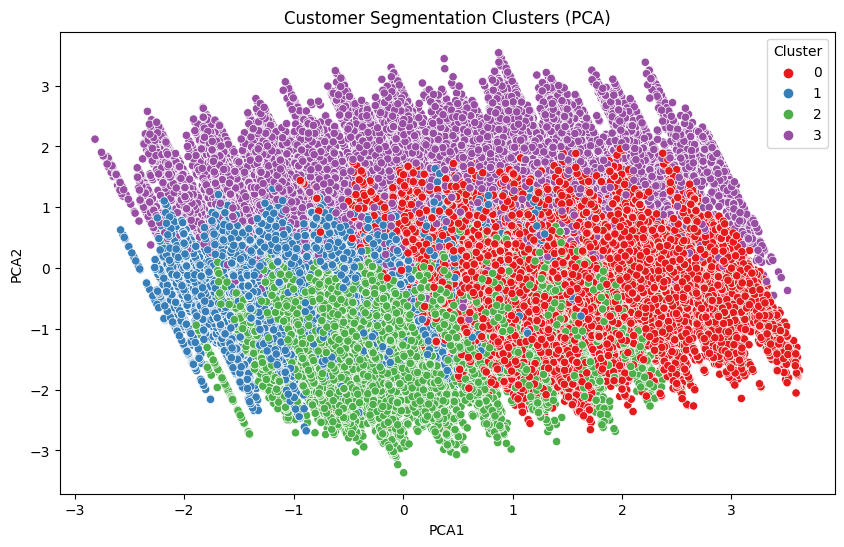

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA components and cluster labels
df_visual = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
df_visual['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_visual, palette='Set1')
plt.title('Customer Segmentation Clusters (PCA)')
plt.show()

## Cluster Analysis

In [13]:
# Analyze each cluster by calculating the mean of features
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
Cluster,,,,,,,,,
0,1.003002e+06,1.00000,3.010394,8.564236,1.070330,1.864734,0.999911,5.399260,9414.352106
1,1.003001e+06,1.00000,1.906513,3.748668,1.011468,1.884269,0.000000,5.208729,9386.930517
2,1.002976e+06,0.99999,2.485050,15.526884,1.033625,1.854569,0.000000,5.273128,9552.495739
3,1.003130e+06,0.00000,2.506502,6.740442,1.048635,1.825386,0.419622,5.717682,8734.455378


Based on the customer segmentation analysis for Walmart's online store, we can draw the following conclusions for each cluster:

1. **Cluster 0**: This segment predominantly consists of male customers in their 30s (age bin 26-35), with occupations leaning towards medium-level jobs. These customers are mostly from **City Category C**, indicating they may reside in smaller cities. They tend to have stayed in their current city for a medium period (2-3 years). Their marital status shows they are mostly married, and they make purchases in product categories with a slightly higher average, with a typical purchase amount of **$9414**.

2. **Cluster 1**: This group is also male-dominated, but skewing towards younger customers (age bin 18-25) in lower occupation levels. They are primarily from **City Category A** (larger metropolitan areas) and tend to stay longer in their current city (3-4 years). Although they are single, their purchasing behavior is similar to Cluster 0, with an average purchase amount of **$9387**.

3. **Cluster 2**: This segment is characterized by male customers in the mid-level age range (age bin 26-35), with higher-level occupations compared to other clusters. They are mainly from **City Category C**, similar to Cluster 0, and have also stayed longer in their cities (4+ years). They focus on higher-priced product categories, with an average purchase amount of **$9552**, making them high-value customers.

4. **Cluster 3**: This group is distinct as it consists mainly of female customers (age bin 26-35). Their occupation levels are mid-range, and they are primarily from **City Category B**. They show moderate city mobility (staying for around 2-3 years) and include both married and single individuals. Their average purchase amount is **$8734**, lower than other clusters, suggesting a different purchasing behavior compared to the male-dominated segments.

### Conclusion:
Walmart's online store caters to distinct customer segments with different behaviors. Male customers across all age groups tend to spend more, especially those in mid-level occupations from smaller cities (Cluster 2). Female customers, while less prominent in terms of purchase amount (Cluster 3), represent a valuable segment in terms of diversity in city category and marital status. This segmentation can help Walmart tailor its marketing and product strategies by focusing on high-value customers in smaller cities while addressing the needs of younger, urban consumers with targeted promotions.

.

.

# Product Recommendation Systems

#### To build a Product Recommendation System, we can use collaborative filtering, which is based on user-product interactions.

## Data Preparation

In [15]:
# Create a pivot table where rows represent users and columns represent products
user_product_matrix = df.pivot_table(index='User_ID', columns='Product_ID', values='Purchase', fill_value=0)

# Display the first few rows of the user-product matrix
user_product_matrix.head()

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,13650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building a Recommendation Model using Collaborative Filtering

#### We can use Singular Value Decomposition (SVD) to generate recommendations.

In [17]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the data into the Surprise library format
reader = Reader(rating_scale=(df['Purchase'].min(), df['Purchase'].max()))
data = Dataset.load_from_df(df[['User_ID', 'Product_ID', 'Purchase']], reader)

# Split into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Build the SVD model
svd_model = SVD()

# Train the model
svd_model.fit(trainset)

# Test the model
predictions = svd_model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

RMSE: 15526.9623


15526.96227820958

## Generating Recommendations

#### We can now use the trained model to generate product recommendations for users.

In [18]:
# Function to get top N product recommendations for a user
def get_recommendations(user_id, model, num_recommendations=5):
    # Get a list of all product IDs
    all_product_ids = df['Product_ID'].unique()

    # Predict purchase amounts for all products not yet purchased by the user
    user_recommendations = [model.predict(user_id, product_id) for product_id in all_product_ids]

    # Sort by predicted purchase value and return top N recommendations
    user_recommendations = sorted(user_recommendations, key=lambda x: x.est, reverse=True)
    
    # Return the top N product IDs
    return [rec.iid for rec in user_recommendations[:num_recommendations]]

# Example: Get top 5 recommendations for user with ID 1000001
recommendations = get_recommendations(1000001, svd_model, num_recommendations=5)
print(f"Top 5 recommended products for User 1000001: {recommendations}")

Top 5 recommended products for User 1000001: ['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442']


## Evaluating Recommendations

### Precision and Recall at K

#### Precision and Recall are important metrics for recommendation systems. Precision@K checks how many of the top-K recommended items were relevant, and Recall@K checks how many of the relevant items were actually recommended.

In [19]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=5, threshold=3.5):
    """Return precision and recall at k metrics for each user."""

    # Map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

### Evaluating Precision@K and Recall@K

In [20]:
# Calculate precision@k and recall@k
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3.5)

# Average precision and recall across all users
print(f'Average Precision@K: {sum(precisions.values()) / len(precisions)}')
print(f'Average Recall@K: {sum(recalls.values()) / len(recalls)}')

Average Precision@K: 1.0
Average Recall@K: 0.532561460339873


The results from the recommendation system evaluation indicate the following:

### **Average Precision@K: 1.0**
- **Precision@K measures** how many of the top-K recommended items were relevant. A precision score of **1.0** means that all the items recommended to users were relevant, which suggests that the system is very accurate in selecting the right products for each user. In other words, when the system makes a recommendation, it's always hitting the mark in terms of relevance.

### **Average Recall@K: 0.5326**
- **Recall@K measures** how many of the relevant items were actually recommended to users from the total relevant items. A recall score of **0.5326** indicates that the system is only capturing about **53.26%** of all the relevant products available for each user. While this shows that the system is fairly good at recommending relevant items, it’s missing about 46.74% of relevant products that could have been suggested.

### **Conclusion**:
- The **high precision (1.0)** suggests that the recommendation system is making very accurate predictions, only recommending relevant products.
- However, the **moderate recall (0.53)** indicates that the system could improve in finding more relevant products for each user. While the system recommends highly relevant products, it is not suggesting all possible relevant products.

To improve recall without sacrificing precision, the system could potentially increase the number of recommendations made to users (i.e., increase K), or explore more diverse recommendation methods (such as content-based filtering) to capture a wider range of relevant items.

# Optimizing pricing strategies to maximize sales and profitability

## Analyzing the Relationship Between Price and Sales

#### Average Purchase by Product Category

Product_Category
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64


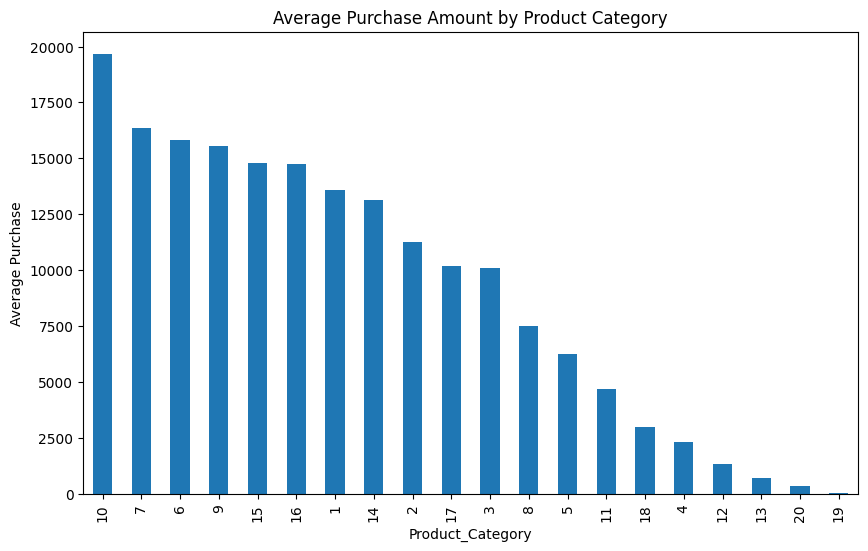

In [21]:
# Average purchase amount by product category
product_category_purchase = df.groupby('Product_Category')['Purchase'].mean().sort_values(ascending=False)
print(product_category_purchase)

# Plotting the results
import matplotlib.pyplot as plt
product_category_purchase.plot(kind='bar', figsize=(10,6))
plt.title('Average Purchase Amount by Product Category')
plt.ylabel('Average Purchase')
plt.show()

#### Average Purchase by Age Group

Age
5    9534.808031
6    9336.280459
3    9331.350695
2    9252.690633
4    9208.625697
1    9169.663606
0    8933.464640
Name: Purchase, dtype: float64


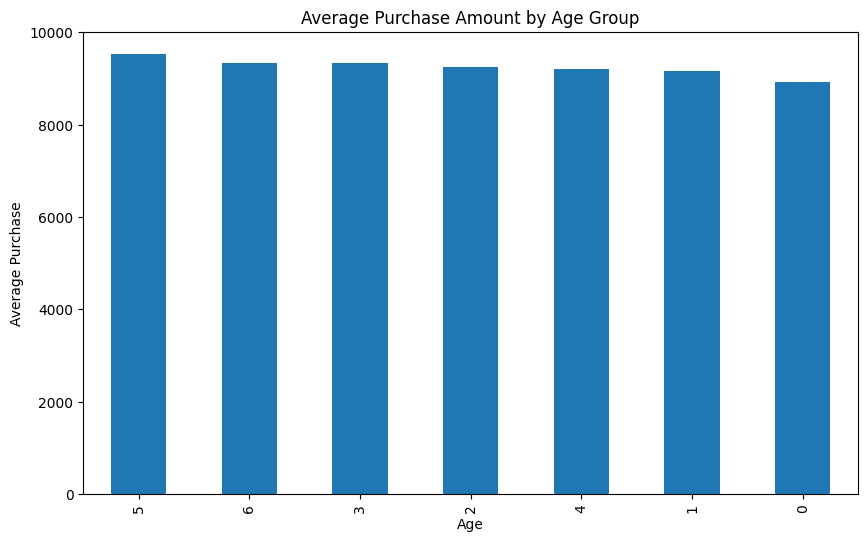

In [22]:
# Average purchase amount by age group
age_purchase = df.groupby('Age')['Purchase'].mean().sort_values(ascending=False)
print(age_purchase)

# Plotting the results
age_purchase.plot(kind='bar', figsize=(10,6))
plt.title('Average Purchase Amount by Age Group')
plt.ylabel('Average Purchase')
plt.show()

## Identifying Price Sensitivity

#### We can calculate the price elasticity of demand by analyzing how changes in prices (or purchase amounts) affect sales volume. This can help us understand which products or customer segments are more sensitive to price changes.

## Calculating Elasticity

#### To calculate the price elasticity of demand, we need to measure how the quantity purchased changes in response to price changes.

In [23]:
import numpy as np

# Calculating price elasticity of demand for each product category
df['log_purchase'] = np.log(df['Purchase'])
df['log_quantity'] = np.log(df['Product_Category'])

# Create a model to calculate elasticity
import statsmodels.api as sm

X = sm.add_constant(df['log_purchase'])
y = df['log_quantity']
model = sm.OLS(y, X).fit()

# Print elasticity
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                 1.379e+05
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:32:15   Log-Likelihood:            -6.5886e+05
No. Observations:              550068   AIC:                         1.318e+06
Df Residuals:                  550066   BIC:                         1.318e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2018      0.013    473.574   

## Optimizing Pricing Strategies

#### Based on the elasticity analysis, we can adjust pricing strategies to maximize sales and profitability. Products with low elasticity (inelastic demand) can sustain higher prices without significantly affecting sales, while products with high elasticity (elastic demand) may require price reductions to stimulate more purchases.

### Profitability Analysis by Product Category

#### We can calculate profitability by considering the total sales (purchase amount) minus a hypothetical cost for each product category.

Product_Category
1     1902994854
5      938061904
8      847483299
6      323331662
2      267800266
3      203680453
16     144580072
11     112091025
10     100555426
15      92717442
7       60766496
4       26851603
14      19915701
18       9196451
9        6362124
17       5867139
12       5233169
13       3731151
20        855477
19        -12757
Name: Profit, dtype: int64


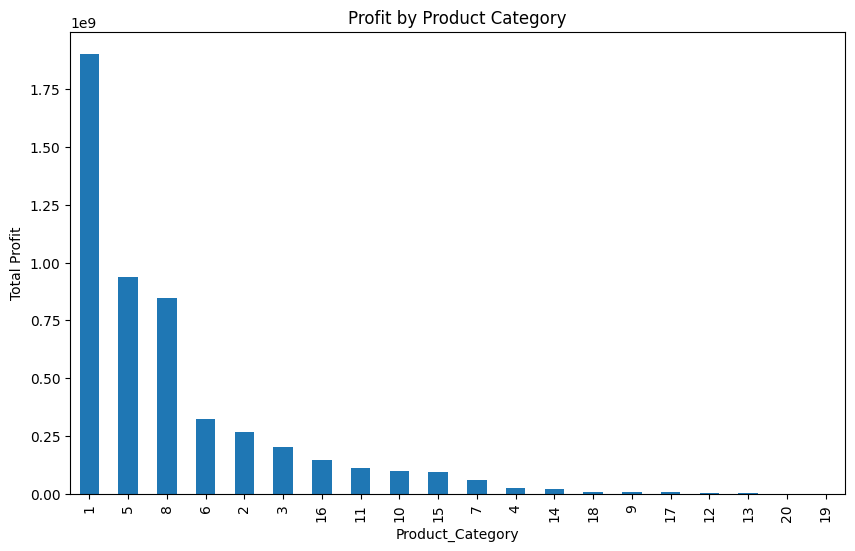

In [25]:
# Assuming hypothetical costs for each product category (adjust as needed)
# Example of hypothetical costs for each product category (you can adjust the values)
cost_per_product = {
    1: 50, 
    2: 30, 
    3: 20, 
    4: 45, 
    5: 25, 
    6: 40, 
    7: 35, 
    8: 60, 
    9: 20, 
    10: 55,
    11: 70, 
    12: 25, 
    13: 50, 
    14: 65, 
    15: 40, 
    16: 55, 
    17: 20, 
    18: 30, 
    19: 45, 
    20: 35
}


# Calculate profitability for each product category
df['Cost'] = df['Product_Category'].map(cost_per_product)
df['Profit'] = df['Purchase'] - df['Cost']

# Group by product category to find total profit
profit_by_category = df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
print(profit_by_category)

# Plotting the profitability results
profit_by_category.plot(kind='bar', figsize=(10,6))
plt.title('Profit by Product Category')
plt.ylabel('Total Profit')
plt.show()

Based on the OLS regression results and the pricing strategy analysis, we can draw the following conclusions regarding Walmart’s online store:

### Key Insights:

1. **Price Elasticity of Demand**:
   - The **negative coefficient (-0.5422)** for `log_purchase` in the regression model indicates an **inverse relationship** between the purchase amount (price) and the quantity purchased. As prices increase, the quantity purchased tends to decrease. This suggests that Walmart's customers are **price-sensitive**, particularly for certain product categories.
   - With an **R-squared value of 0.200**, the model explains **20% of the variation in quantity purchased** based on price. While this suggests that price is a significant factor in determining the quantity sold, other factors (such as promotions, product features, and customer preferences) also influence purchasing behavior.

2. **Elasticity Interpretation**:
   - The coefficient for `log_purchase` implies that for a **1% increase in price**, the quantity demanded decreases by approximately **0.54%**. This level of elasticity indicates that many products in Walmart’s catalog are **somewhat elastic**. Therefore, price changes can have a notable effect on sales volume, but it is not highly elastic.

3. **Strategic Pricing Recommendations**:
   - Given the elasticity levels, Walmart should be cautious when raising prices, as higher prices could reduce demand. For **price-sensitive categories**, keeping prices competitive may help to maximize sales volumes.
   - For **inelastic categories** (those less affected by price changes), there is room to **increase prices without a major impact on sales volumes**, which could enhance overall profitability.

4. **Profitability and Focus Areas**:
   - By identifying products with lower price sensitivity and higher profitability, Walmart can target specific categories for **price increases** while maintaining customer satisfaction.
   - For products with higher elasticity, Walmart could use **promotional strategies** and **discounts** to drive larger quantities of sales, potentially offsetting lower margins with increased volume.

### Conclusion:
The analysis reveals that while **pricing plays a significant role in purchasing decisions**, Walmart must balance its pricing strategy carefully. For products where demand is elastic, lowering prices may drive higher sales volumes. Conversely, inelastic products offer opportunities for price increases to improve profitability without significantly affecting sales. By leveraging this elasticity insight, Walmart can fine-tune its pricing to **maximize both sales and profit margins**, tailoring strategies to specific product categories and customer segments.